In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [208]:
df_replay5=pd.read_csv('../results/logs/normal1st/Replay.csv/eval_results.csv')
df_cumulative5=pd.read_csv('../results/logs/normal1st/Cumulative.csv/eval_results.csv')
df_naive5=pd.read_csv('../results/logs/normal1st/Naive.csv/eval_results.csv')

In [209]:
len(df_replay5)


4

In [210]:

l=np.squeeze([df_replay5.eval_accuracy[-2:].values])
l1=np.squeeze([df_naive5.eval_accuracy[-2:].values])
l2=np.squeeze([df_cumulative5.eval_accuracy[-2:].values])
label=[0,1]

In [211]:
len(l),len(l1),len(l2),len(label)

(2, 2, 2, 2)

In [212]:
lbl=[]
strat=[]

In [213]:
lbl.append(label*3)

In [214]:
len(np.squeeze(lbl))

6

In [215]:
lbl=np.squeeze(lbl)

In [216]:
acc=[]

In [217]:
acc.extend(l1)
acc.extend(l)
acc.extend(l2)


In [218]:
len(acc)

6

In [219]:
len(np.squeeze(acc))

6

In [220]:
acc=np.squeeze(acc)

In [221]:
for i in range(2):
    strat.append("naive")

for i in range(2):
    strat.append("replay")

for i in range(2):
    strat.append("cumulative")

In [222]:
len(strat)

6

In [223]:
len(lbl),len(strat),len(acc)

(6, 6, 6)

In [224]:
dict_data={
    "label": lbl,
    "strategies":strat,
    "acc":acc
}

final_df=pd.DataFrame.from_dict(dict_data)

In [225]:
final_df.head()

,label,strategies,acc
0,0,naive,0.4902
1,1,naive,1.0000
2,0,replay,0.9490
3,1,replay,0.9911
4,0,cumulative,0.9763


In [226]:
sns.set(rc={"figure.figsize":(40, 4)})

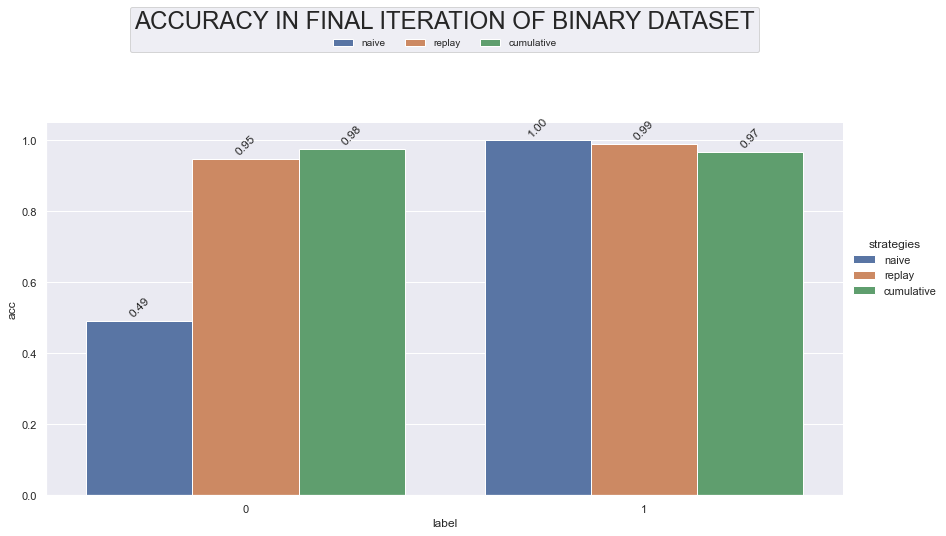

In [231]:

g=sns.catplot(x='label', y='acc',hue='strategies', data=final_df, kind='bar',height=6,aspect=2)
for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=2,rotation=45)

g.ax.legend(bbox_to_anchor=(0, 1.2, 1, 0.102), loc=10, ncol=4, fontsize=10,
          title='ACCURACY IN FINAL ITERATION OF BINARY DATASET', title_fontsize=24)
g.savefig('myfig.png')
#plt.savefig('myfig.png')
